### 氫原子光譜繪製

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spe
from matplotlib import cm
# 啟用互動式圖形，使圖形可以與使用者互動
%matplotlib widget
plt.rcParams['text.usetex'] = True  # 使用LaTeX排版

In [8]:
class Compact:
    def __init__(self, n=1, l=0, m=0, alpha=0.4):
        self.n = n  # 主量子數
        self.l = l  # 角動量量子數
        self.m = m  # 磁量子數
        self.make2d = True  # 是否繪製2D圖形
        self.make3d = True  # 是否繪製3D圖形
        self.make_color_bar = True  # 是否顯示色彩條
        self.alpha = alpha  # 3D圖形的透明度

        # 將matplotlib的東西準備好
        plt.style.use("default")
        self.fig = plt.figure(figsize=(10, 4), dpi=400)  # 創建圖形物件
        self.fig.tight_layout()
        self.ax = None
        self.ax2d = None

    @staticmethod
    def psi_r(r, n=1, l=0):
        """
        計算徑向波函數

        :param r: 徑向坐標
        :param n: 主量子數
        :param l: 角動量量子數
        :return: 徑向波函數
        """
        # R_nl(r) = 係數 * 拉蓋爾多項式
        # 係數
        coeff = np.sqrt((2.0 / n) ** 3 * spe.factorial(n - l - 1) /
                        (n * spe.factorial(n + l) * 2.0))
        # 拉蓋爾多項式
        laguerre = spe.assoc_laguerre(2.0 * r / n, n - l - 1, 2 * l + 1)
        # 徑向波函數
        return coeff * np.exp(-r / n) * (2.0 * r / n) ** l * laguerre

    @staticmethod
    def psi_ang(phi, theta, l=0, m=0):
        """
        計算角向波函數

        :param phi: 方位角座標
        :param theta: 極座標
        :param l: 角動量量子數
        :param m: 磁量子數
        :return: 角向波函數
        """
        # 直接使用scipy內建的特殊函數sph_harm
        return spe.sph_harm(m, l, phi, theta).real

    def set_up(self):
        self.fig.clear()  # 將目前的圖清除乾淨
        total_draw = 2 if self.make2d and self.make3d else \
            1 if self.make2d or self.make3d else 0
        self.fig.set_size_inches(5 * total_draw, 4)

        # 繪製3D圖形
        if self.make3d:
            self.ax = self.fig.add_subplot(1, total_draw, 1, projection="3d")
            self.ax.set_zticklabels([])  # 設定z軸刻度文字為空，即不顯示
            self.ax.set_yticklabels([])  # 設定y軸刻度文字為空，即不顯示
            self.ax.set_xticklabels([])  # 設定x軸刻度文字為空，即不顯示
            self.ax.set_box_aspect((1, 1, 1))  # 設定3D軸的長寬高比為1:1:1
            theta, phi = np.linspace(0, 8, 500), np.linspace(0, 4, 500)
            theta, phi = np.meshgrid(theta, phi)
            y_lm = self.psi_ang(theta, phi, l=self.l, m=self.m)

            x = abs(y_lm) * np.sin(phi) * np.cos(theta)
            y = abs(y_lm) * np.sin(phi) * np.sin(theta)
            z = abs(y_lm) * np.cos(phi)
            lim_max = max((x.max(), y.max(), z.max()))
            lim_min = min((x.min(), y.min(), z.min()))
            self.ax.set_xlim(lim_min, lim_max)  # 設定x軸範圍
            self.ax.set_xlabel("x", labelpad=-15)  # 設定x軸標籤，並將標籤向下移動一點
            self.ax.set_ylim(lim_min, lim_max)  # 設定y軸範圍
            self.ax.set_ylabel("y", labelpad=-15)  # 設定y軸標籤，並將標籤向下移動一點
            self.ax.set_zlim(lim_min, lim_max)  # 設定z軸範圍
            self.ax.set_zlabel("z", labelpad=-15)  # 設定z軸標籤，並將標籤向下移動一點

            p = self.ax.plot_surface(x, y, z, cmap=cm.rainbow, alpha=self.alpha)  # 繪製3D曲面
            if self.make_color_bar:
                plt.colorbar(p, ax=self.ax)  # 加入色彩條

        # 繪製2D圖形
        if self.make2d:
            self.ax2d = self.fig.add_subplot(1, total_draw, 2 if self.make3d else 1)
            self.ax2d.set_yticklabels([])  # 設定y軸刻度文字為空，即不顯示
            self.ax2d.set_xticklabels([])  # 設定x軸刻度文字為空，即不顯示
            self.ax2d.set_aspect("equal")  # 設定2D軸的長寬比為1:1
            limit = 4 * (self.n + self.l)
            x_1d = np.linspace(-limit, limit, 400)
            z_1d = np.linspace(-limit, limit, 400)
            fx, fz = np.meshgrid(x_1d, z_1d)
            r = np.sqrt(fx ** 2 + fz ** 2)
            theta, phi = np.arctan2(np.sqrt(fx ** 2), fz), np.arctan2(0, fx)

            psinlm = np.abs(self.psi_r(r, self.n, self.l) *
                            self.psi_ang(phi, theta, self.l, self.m))
            c = self.ax2d.pcolormesh(fx, fz, psinlm, cmap=cm.magma, alpha=1)  # 繪製2D彩色圖
            if self.make_color_bar:
                plt.colorbar(c, ax=self.ax2d)  # 加入色彩條

        self.fig.subplots_adjust(top=0.7)  # 調整子圖的上邊緣位置
        self.fig.suptitle(
            r"$\psi _{nlm} \left( r, \theta, \phi \right) = "
            r"\sqrt {\left( {\frac{2}{{na_0 }}} \right)^3 "
            r"\frac{{\left( {n - l - 1} \right)!}}"
            r"{{2n\left[ {\left( {n + l} \right)!} \right]}}} "
            r"e^{ - r/na_0 } \left( {\frac{{2r}}{{na_0 }}} \right)^l "
            r"L_{n - l - 1}^{2l + 1}  "
            r"\cdot Y_l^m \left( {\theta ,\phi } \right)$",
            math_fontfamily="cm", size=20)  # 設定圖形標題及其相關樣式
        self.fig.text(0.5, 0.75, f"(n, l, m) = {(self.n, self.l, self.m)}", horizontalalignment="center", size=17,
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))



    @staticmethod
    def show():
        plt.show()


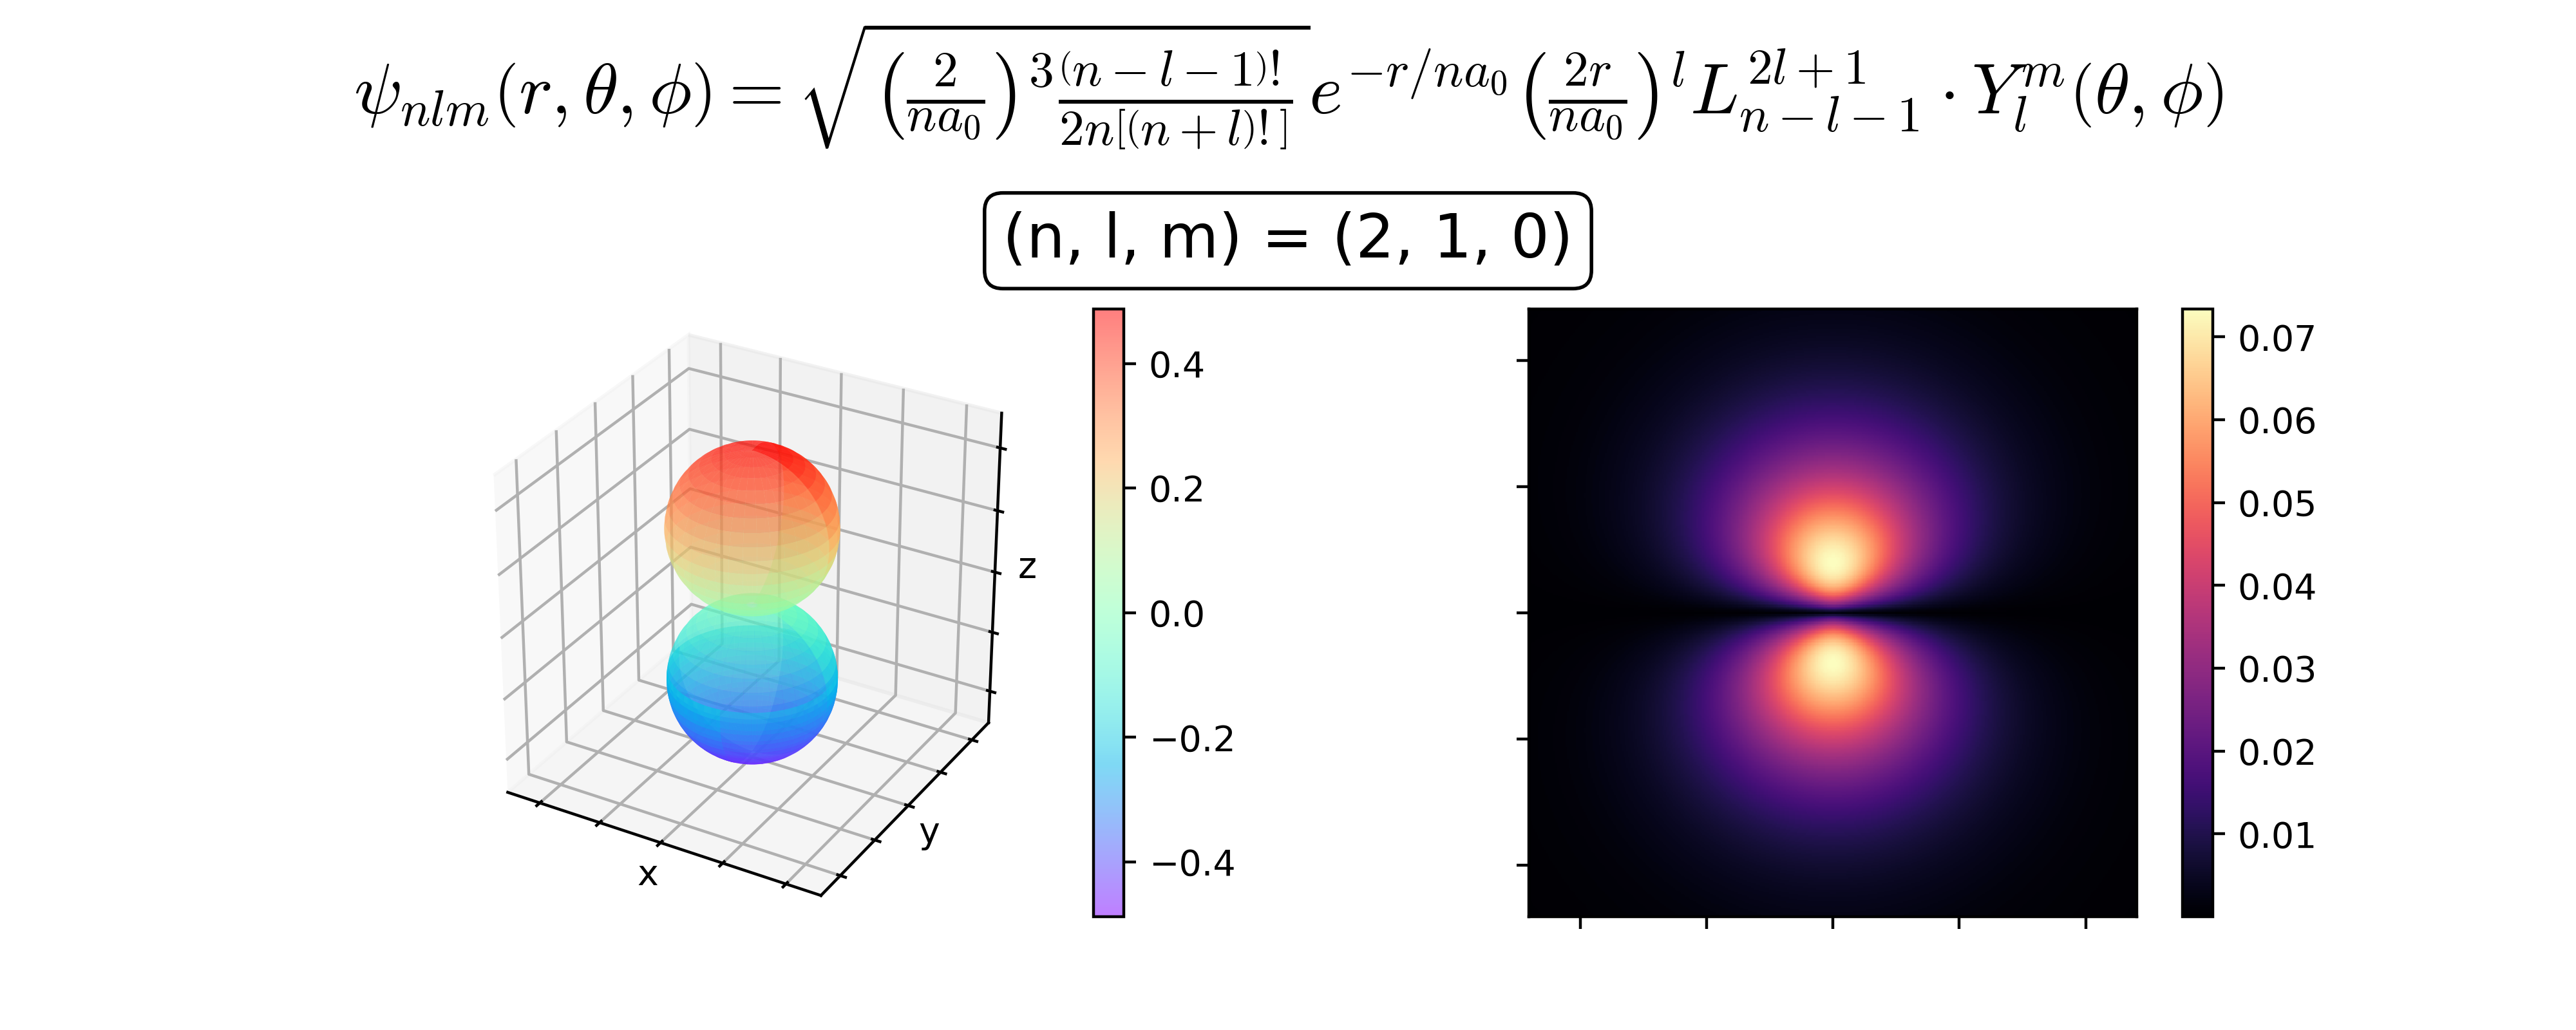

In [9]:
a = Compact()
a.n = 2
a.l = 1
a.m = 0
a.alpha = 0.5  # 透明度
a.set_up()
a.show()

In [4]:
# 電腦卡卡跑這行
plt.clf()